**Name - Aditya Jain**

**Assingment - HR Analytic**

In [3]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # filter warnings
warnings.filterwarnings('ignore')

In [4]:
# import data
data = pd.read_csv("HR_ANA.csv")

In [5]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])
data.head()

No. of rows 1470
No. of columns 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# As we have 35 columns let's sort columns by their datatypes 
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

**Observation-:**

- In this HR Dataset we have 1470 rows and 35 column.
- Out of 35 columns we have 9 features with object datatypes and rest are int64 types.
- Here we have Target Variables 'Attrition'

**These Ordinal features come with following label encoding-:**

- Education: 1- 'Below College',2-'College', 3-'Bachelor', 4-'Masters', 5-'Doctors'.
- EnvironmentSatisfaction: 1-'Low', 2- 'Medium', 3-'High', 4-'Very High'.
- Jobinvolvement: 1-'Low', 2- 'Medium', 3-'High', 4-'Very High'.
- JobSatisfaction:  1-'Low', 2- 'Medium', 3-'High', 4-'Very High'.
- PerformanceRating: 1-'Low', 2-'Average', 3-'Good', 4-'Excellent', 5-'Outstanding'
- RelationshipSatisfaction: 1-'Low', 2- 'Medium', 3-'High', 4-'Very High'.
- WorkLifeBalance: 1-'Bad', 2-'Good', 3-'Better', 4-'Best'

# Statistical Analysis

**Data Integrity Check**

In [15]:
data.duplicated().sum()

0

**Dataset doesnot contains Any duplicate entry.So Yes to go.**

**Missing value check**

In [18]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                          Missing_values  %Missing values
Age                                    0              0.0
StandardHours                          0              0.0
NumCompaniesWorked                     0              0.0
Over18                                 0              0.0
OverTime                               0              0.0
PercentSalaryHike                      0              0.0
PerformanceRating                      0              0.0
RelationshipSatisfaction               0              0.0
StockOptionLevel                       0              0.0
MonthlyIncome                          0              0.0
TotalWorkingYears                      0              0.0
TrainingTimesLastYear                  0              0.0
WorkLifeBalance                        0              0.0
YearsAtCompany                         0              0.0
YearsInCurrentRole                     0              0.0
YearsSinceLastPromotion                0              0.0
MonthlyRate   

**There is no missing data!! This will make it easier to work with the dataset.**

**Statistical Matrix**

<Axes: >

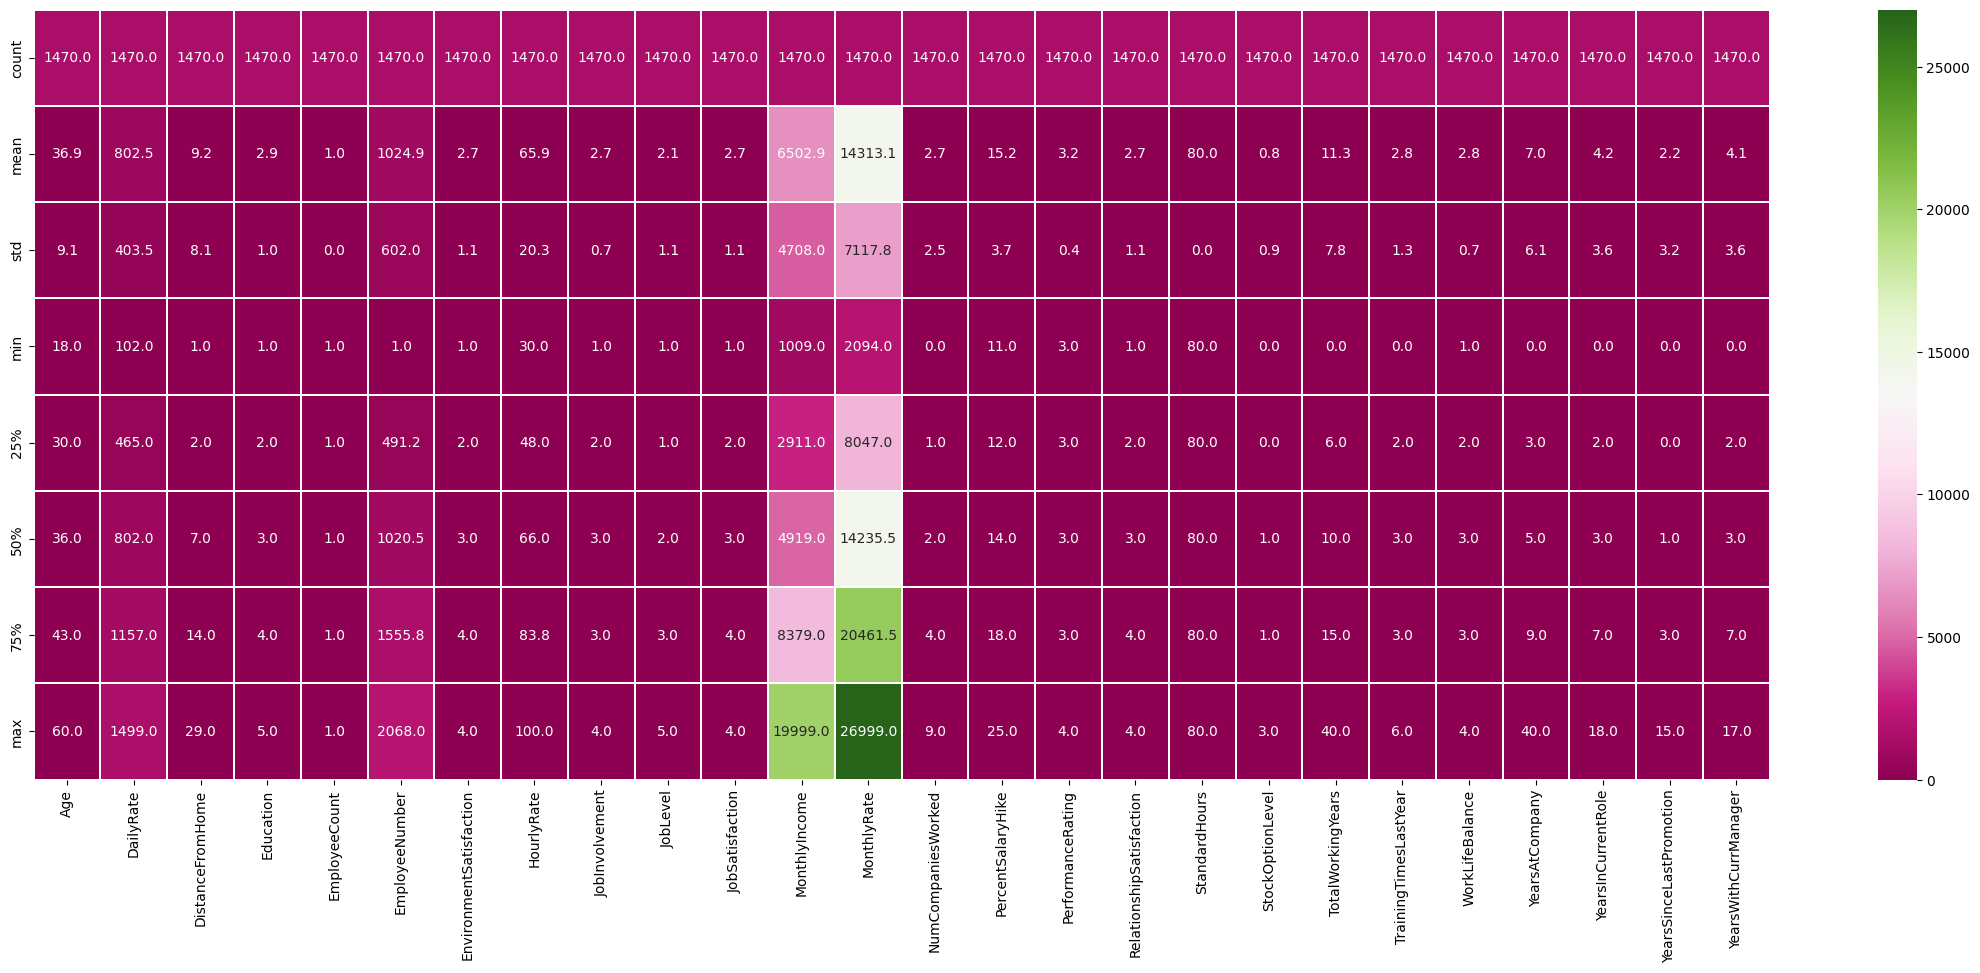

In [21]:
# visulaize the statistic of the columns using heatmap.
plt.figure(figsize=(28,10))
sns.heatmap(data.describe(),linewidths = 0.1, fmt='0.1f', annot = True, cmap='PiYG')

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**Observation-:**

- Minimum employee age is 18 and maximum employee age is 60.
- Average distance from home is 9.1KM. It's means that most of employees travel atleast 18 km in day from home to office.
- 50% of employees has work atleast 2 companies previously.
- For Monthly Income.Monthly rate by looking at 50% and max columns we can say outliers exits in this features.
- By looking at mean and median we can see that some of the features are skew in nature.

**Let's do some Statistical Analysis. Start with target Variables.**

In [26]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

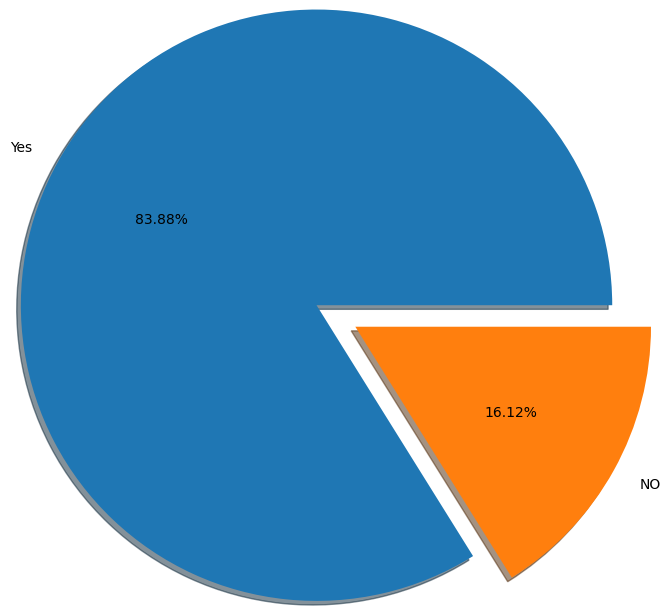

In [27]:
labels ='Yes', 'NO',
fig, ax= plt.subplots()
ax.pie(data['Attrition'].value_counts(),labels = labels, radius= 2, autopct= '%2.2f%%', explode=[0.1,0.2], shadow=True)
plt.show()

**Observation-:**

83.88%(1237 employees) Employees did not leave the organization while 16.12% (237 employees) did leave the organization.Making our datasets to be considered imbalanced since more people stay in organisation. than they actually leave.


In [30]:
Category = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in Category:
    print(i)
    print(data[i].value_counts())
    print("="*100)

Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
MaritalStatus
Married     673
Single 

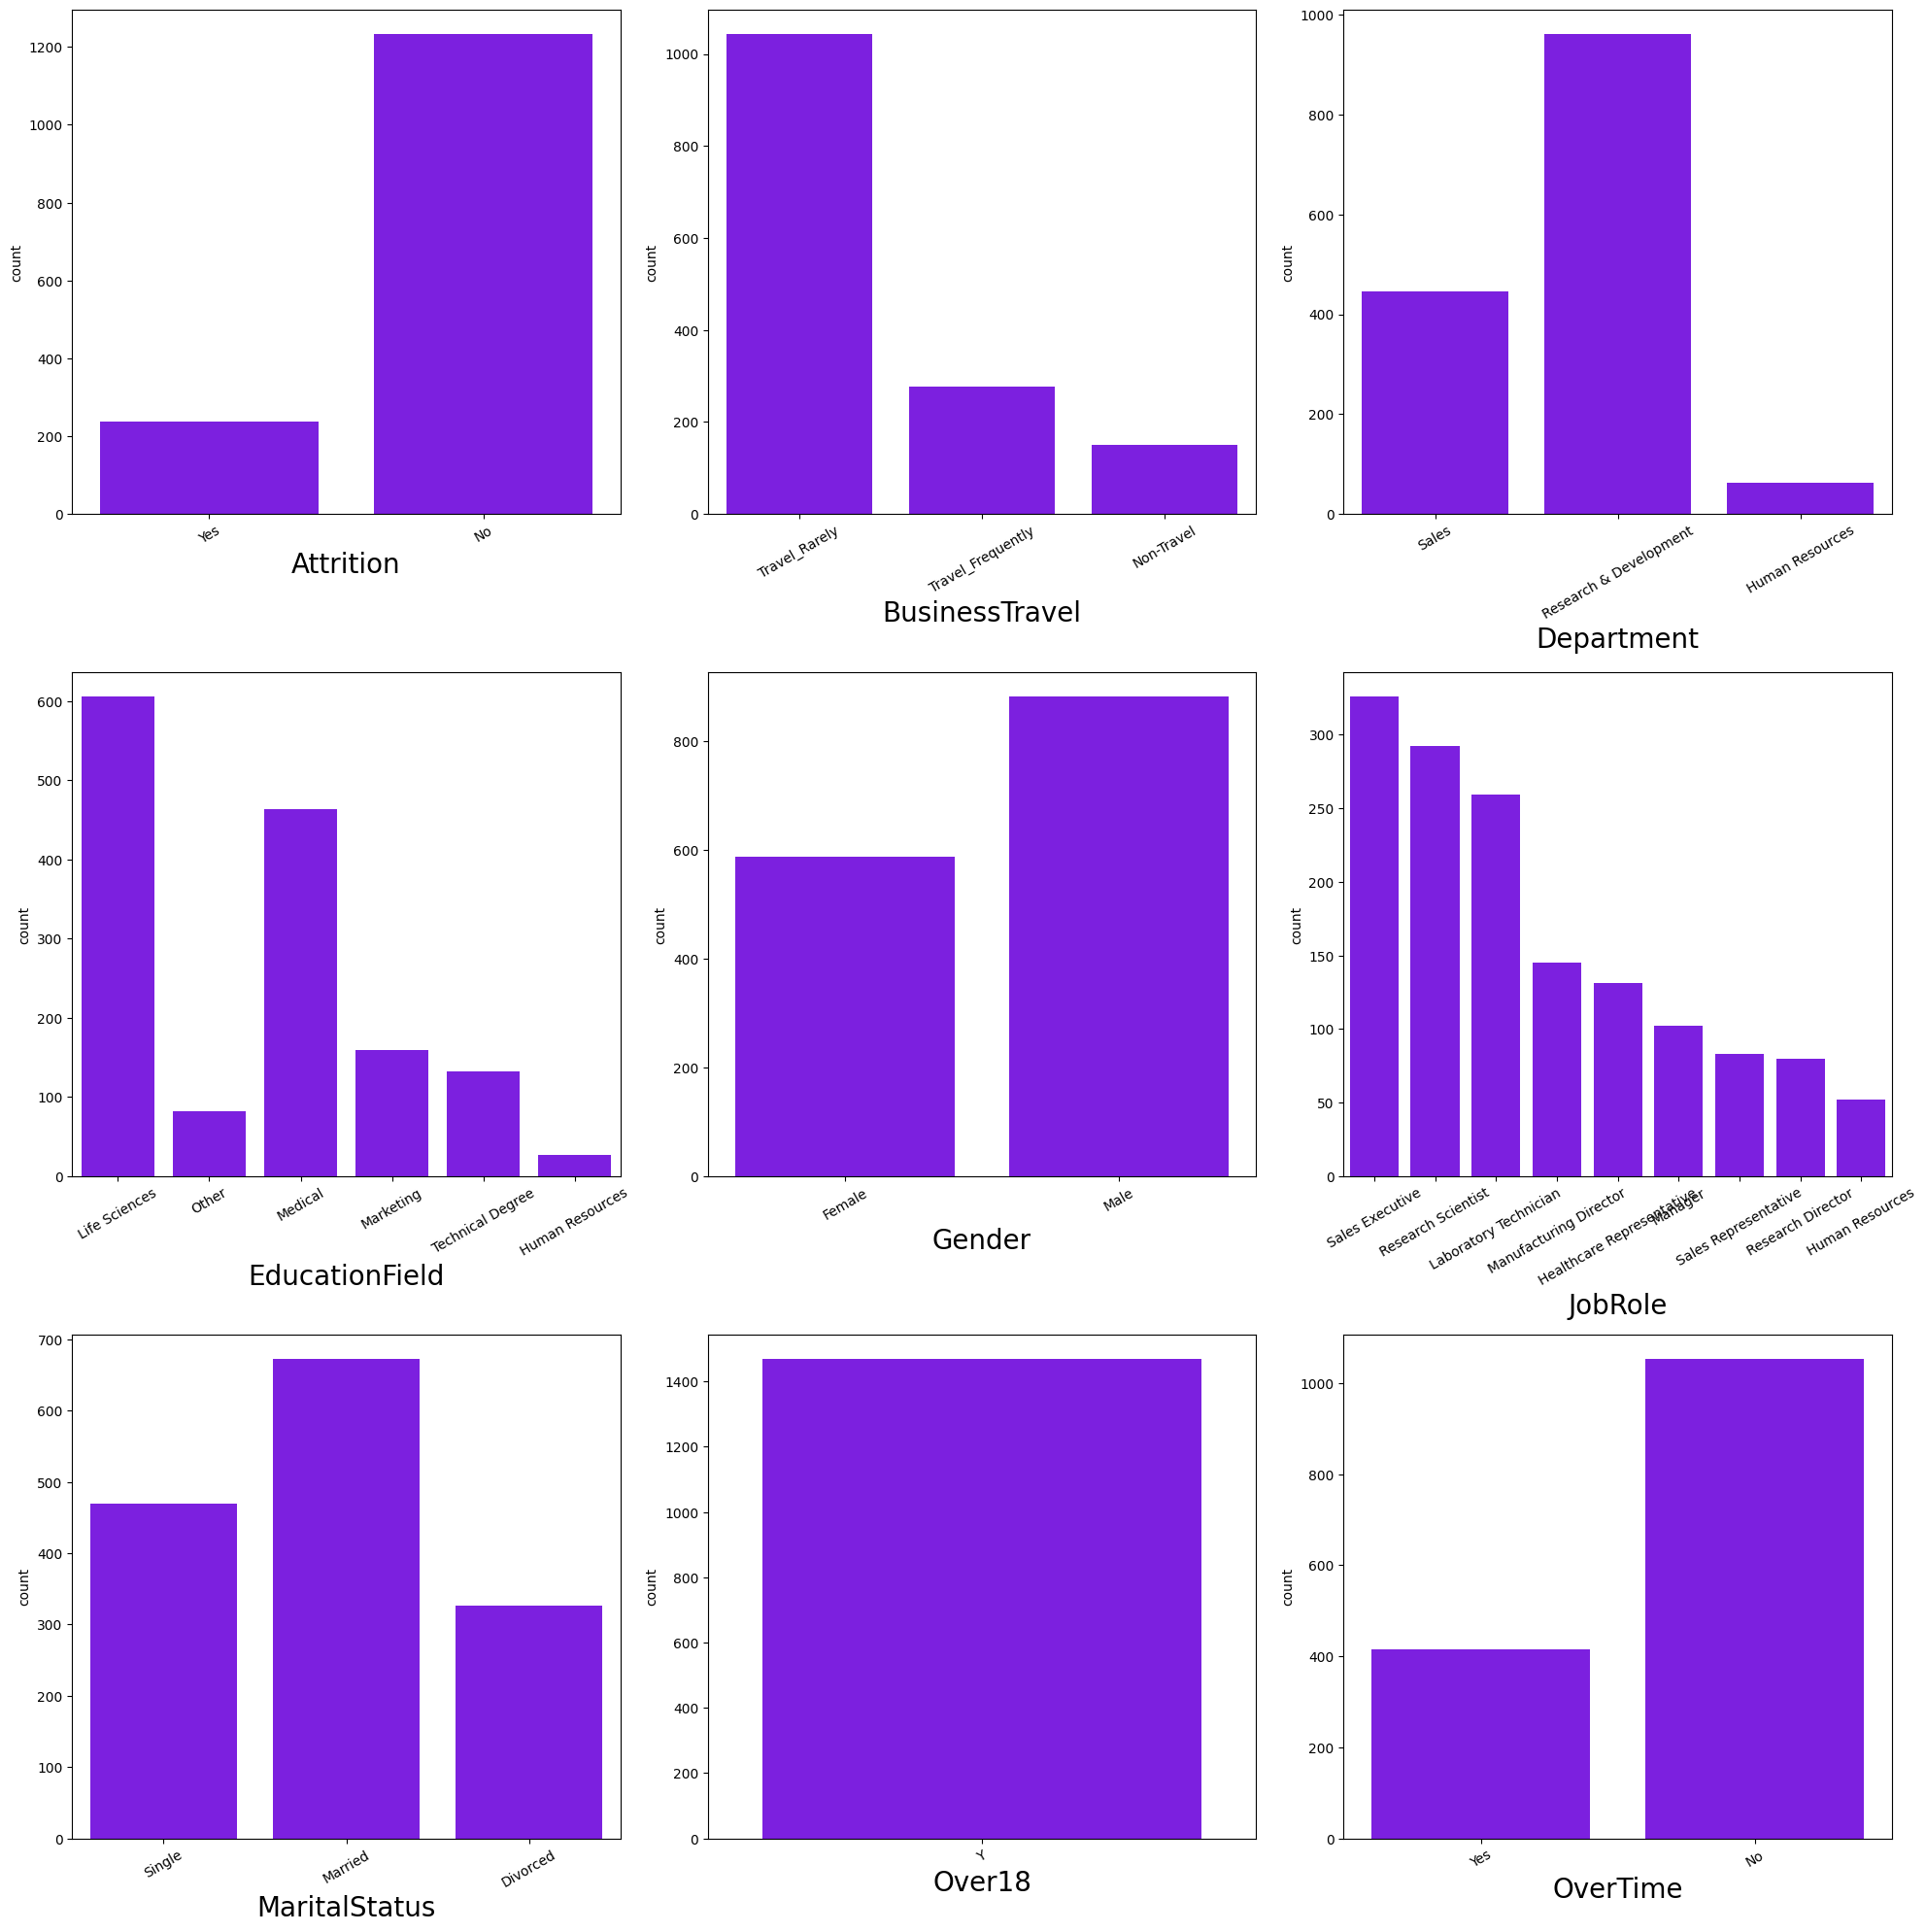

In [31]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor ='white')
plotnumber = 1
Category = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=i,data=data)
        plt.xlabel(i,fontsize = 20)
        plt.xticks(rotation = 30)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Enlisting Value Counts & Sub-Categories of different Ordinal features availabel

In [33]:
Oridinal = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance']
for i in Oridinal:
    print(i)
    print(data[i].value_counts())
    print("="*100)

Education
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
EnvironmentSatisfaction
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
JobInvolvement
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
JobSatisfaction
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
RelationshipSatisfaction
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
PerformanceRating
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
WorkLifeBalance
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


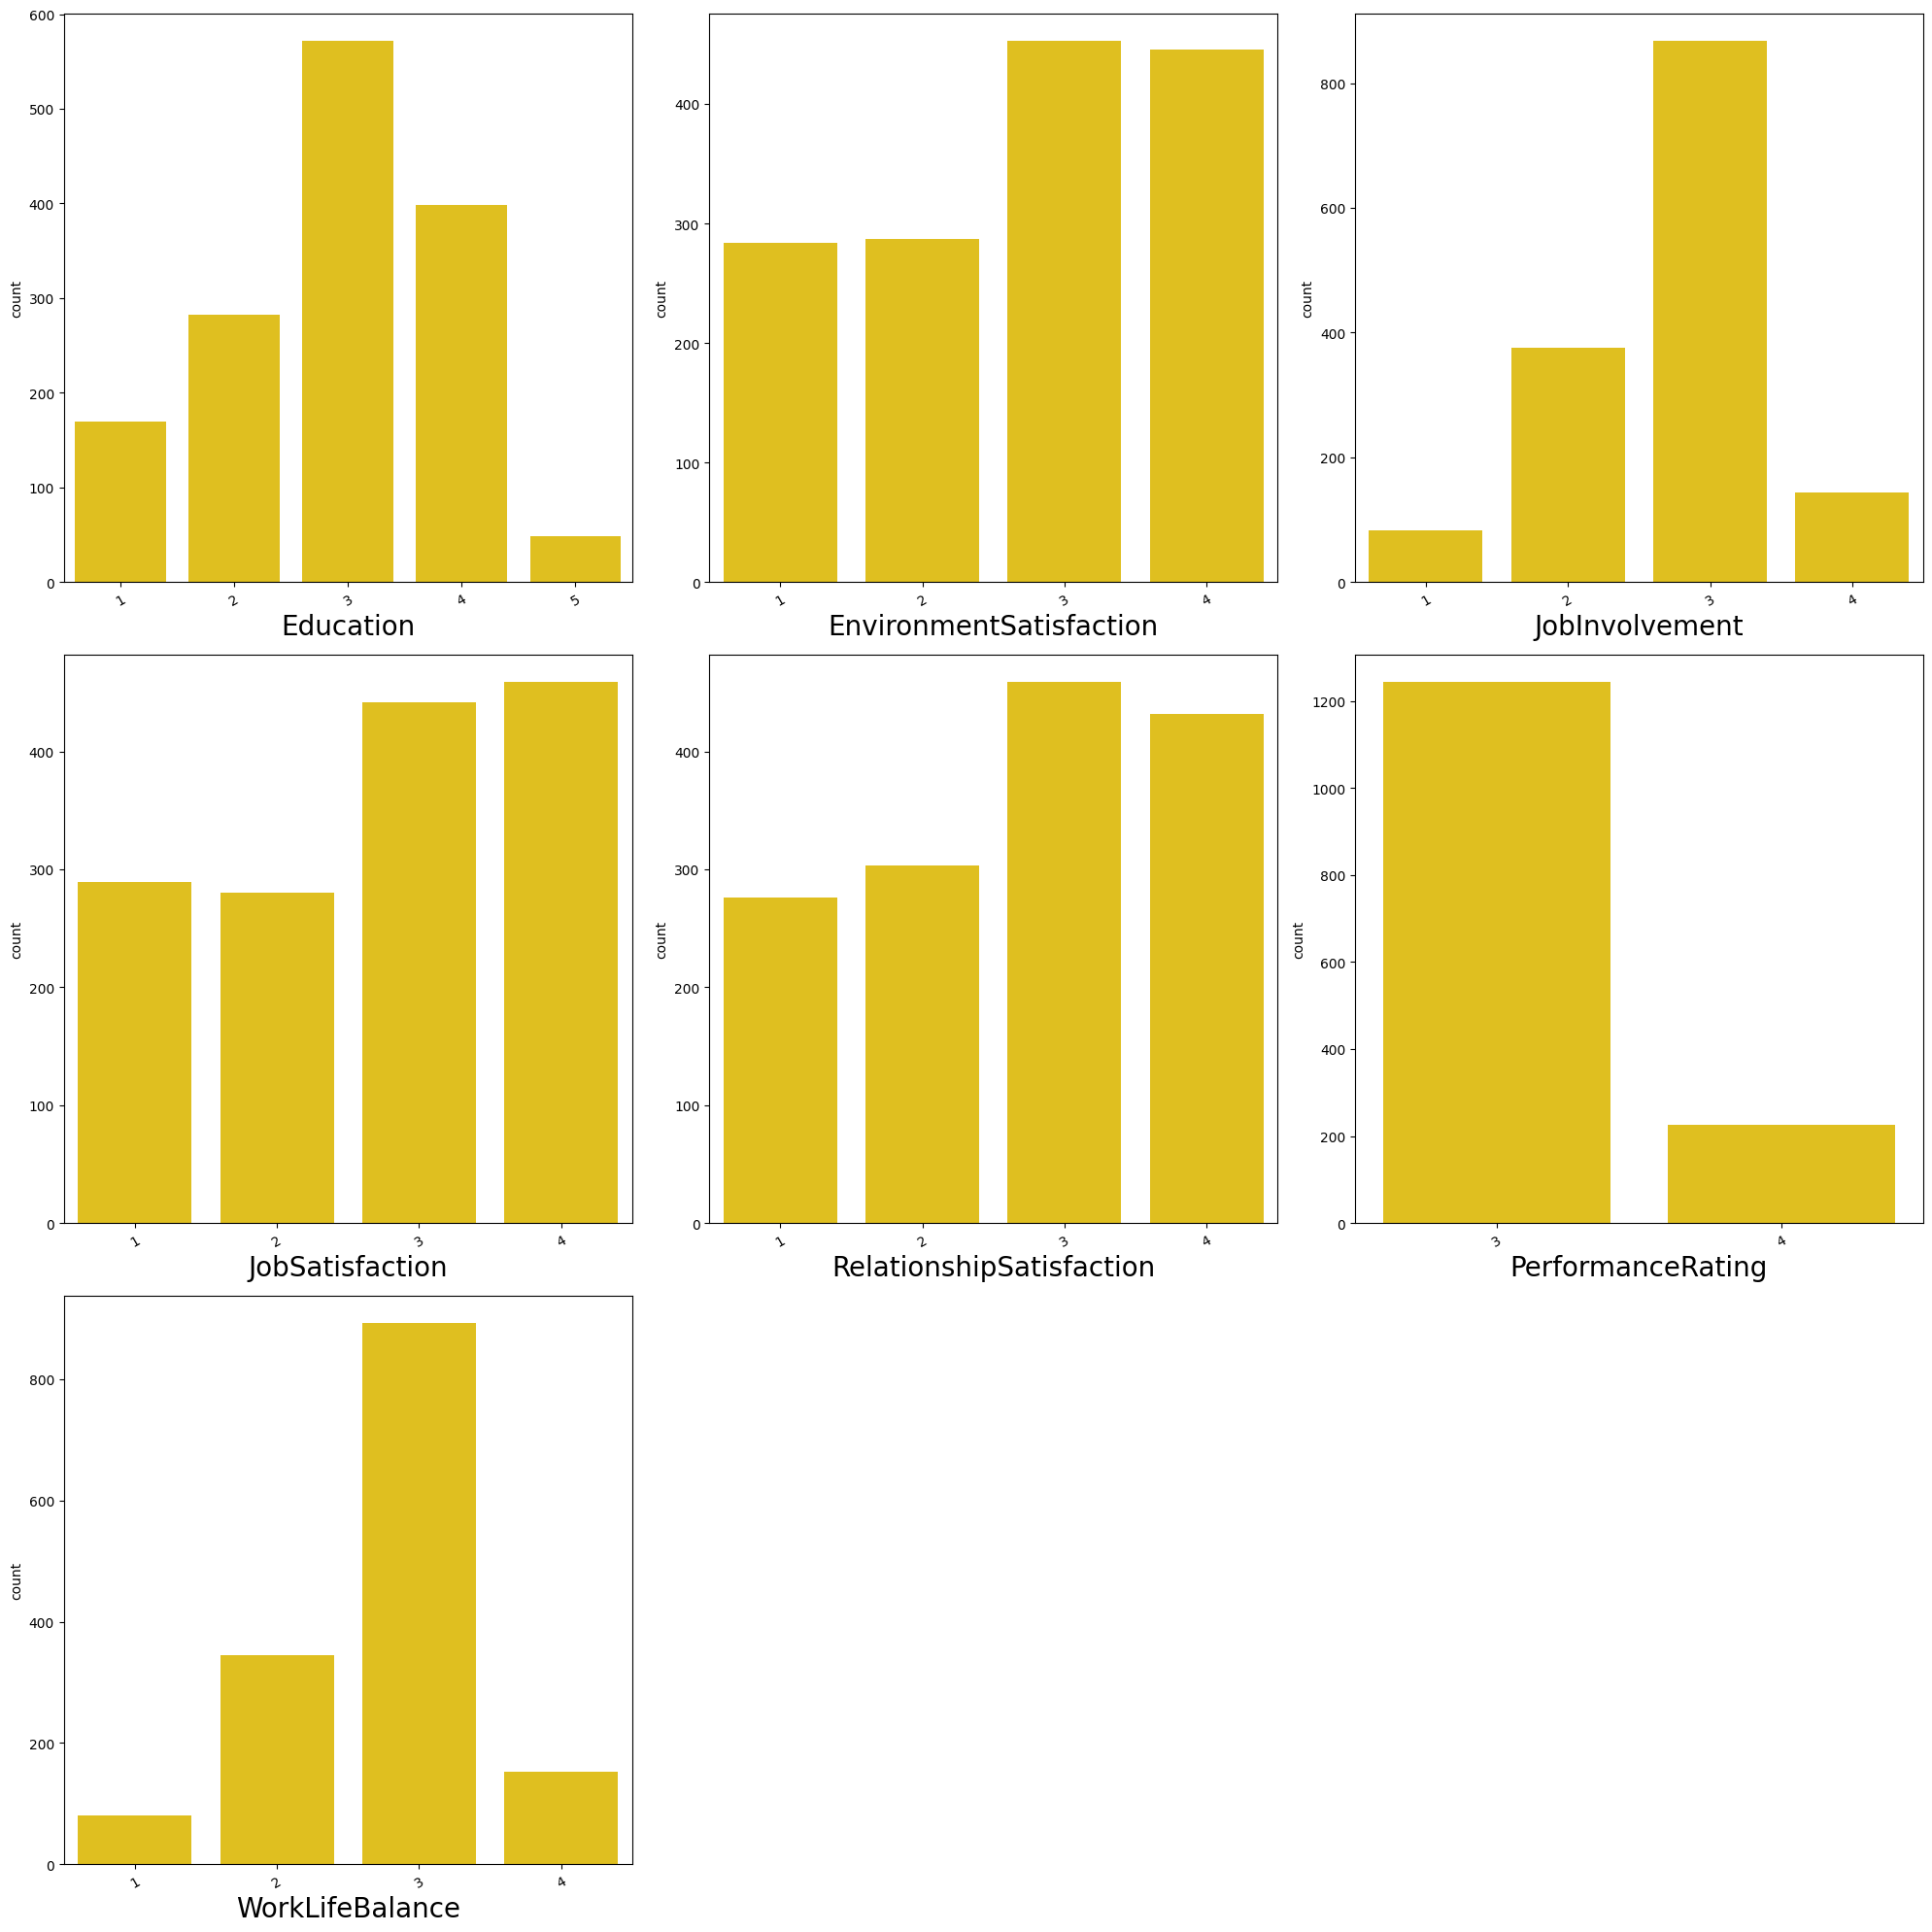

In [34]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor ='white')
plotnumber = 1
Oridinal = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance']
for i in Oridinal:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=i,data=data)
        plt.xlabel(i,fontsize = 20)
        plt.xticks(rotation = 30)
    plotnumber+=1
plt.tight_layout()
plt.show()

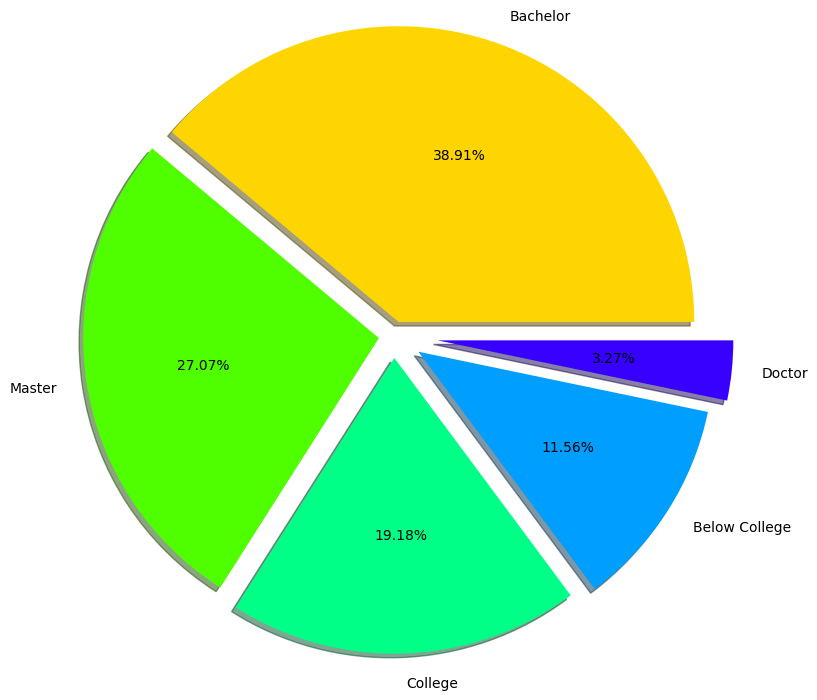

In [35]:
labels ='Bachelor', 'Master','College','Below College','Doctor'
fig, ax= plt.subplots()
ax.pie(data['Education'].value_counts(),labels = labels, radius= 2, autopct= '%3.2f%%', explode=[0.1,0.1,0.15,0.2,0.3],
       shadow=True)
plt.show()

**Observation-:**

- More than 60% student are educated at bachelors and masters.
- 30% of employees are highly educatedwhich envolves masters and doctor degree.
- 39% of employees are graduated.
- Almost 19% employees are educated upto college & 12% are below colleges.

# Let's try to gain insights on to which department this human resources belong and education need of each department through visulalization.

In [39]:
data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

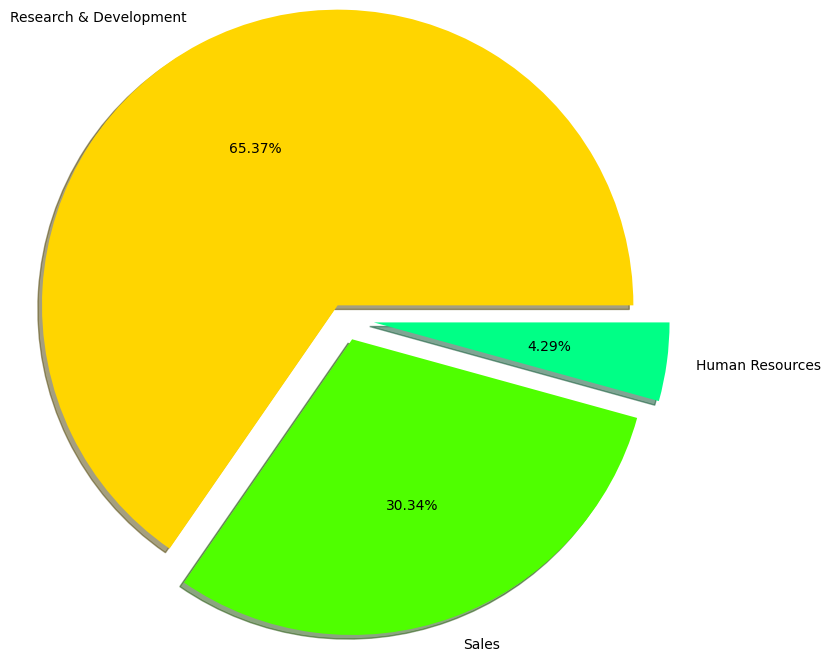

In [40]:
labels ='Research & Development','Sales','Human Resources'
fig, ax= plt.subplots()
ax.pie(data['Department'].value_counts(),labels = labels, radius= 2, autopct= '%3.2f%%', explode=[0.1,0.15,0.2], shadow=True)
plt.show()

In [41]:
pd.crosstab([data.Education],[data.Department], margins = True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


**Observation-:**

- 65.37% of employees belong to Research & Development Department. Out of total 961 Employees no of employee educated at bachelors, Masters, Doctors are 379,225 and 30 respectively.
- Only 63 employee work in HR department.

In [44]:
pd.crosstab([data.Education],[data.Department,data.Attrition], margins = True).style.background_gradient(cmap='summer_r')

# Employee distribution as per education field and level of education

In [46]:
data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

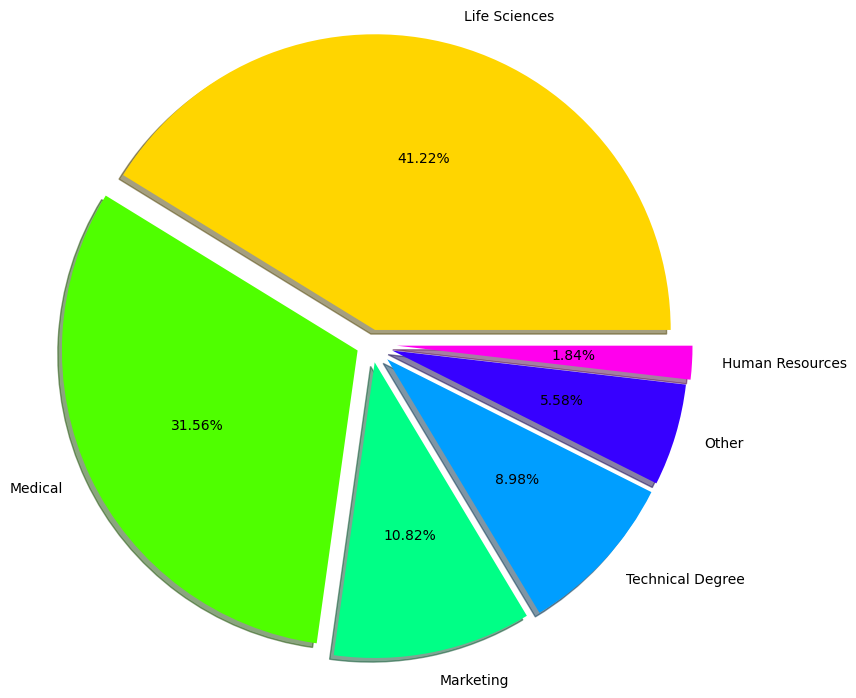

In [47]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig, ax= plt.subplots()
ax.pie(data['EducationField'].value_counts(),labels = labels, radius= 2, autopct= '%3.2f%%', explode=[0.1,0.1,0.125,0.15,0.15,0.175], shadow=True)
plt.show()

In [48]:
pd.crosstab([data.Education],[data.EducationField], margins = True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


**Observation-:**

- 41.22 % Employee comes from life science background followed by Medical Profession with 31.56
- Most employees with technical degree are bachelors
- Most of employee have master and doctors bolong to life science and medical domain.
- 50 % employesin sales department having background of life science and medical.So it will be attrition rate in these employees.


# Let's work with job role

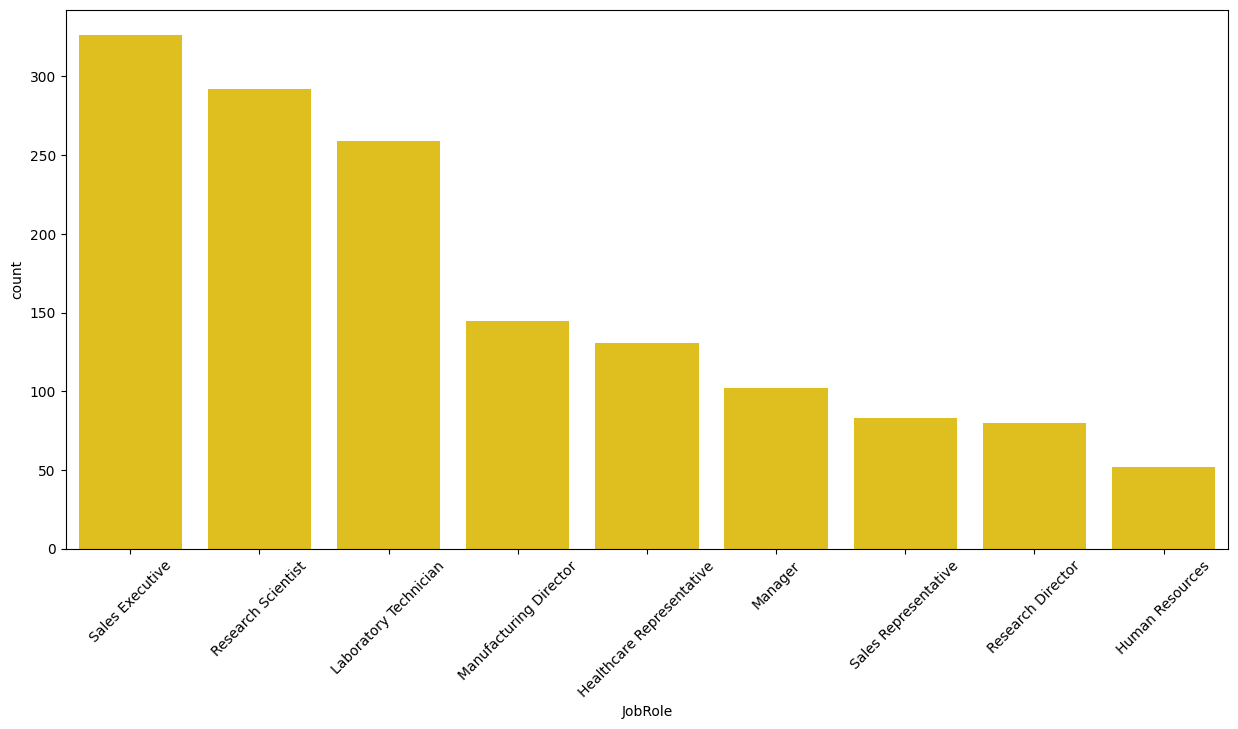

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(x='JobRole',data = data)
plt.xticks(rotation = 45)
plt.show()

**Before going for Attrition by job role.**

First built matrix of department vs job role which will give us idea about number of employees of different job roles across department

In [55]:
pd.crosstab([data.JobRole],[data.Department], margins = True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


**Observation-:**

- There are 3 jobs in HR Department, maximum of which are sales Executive with 446 Total employees.
- Human Resources department has 2 job role. Hr & Manager.

<Figure size 1200x1000 with 0 Axes>

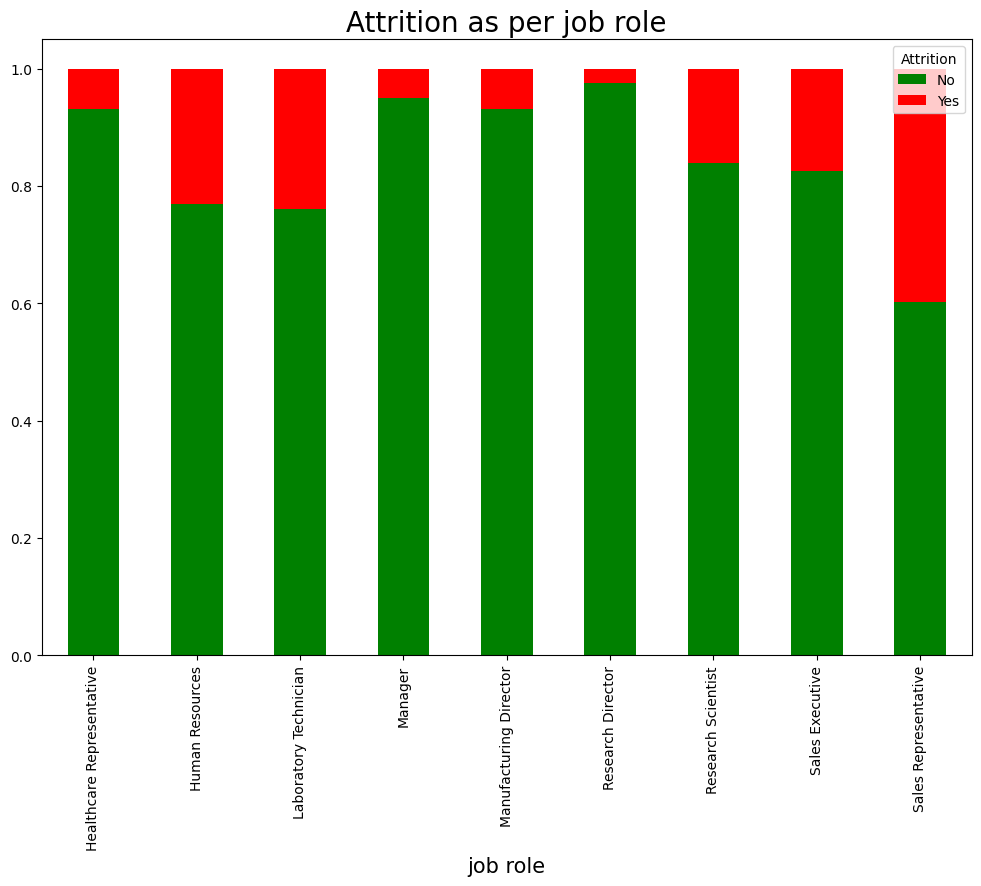

In [58]:
plt.figure(figsize=(12,10))
da = pd.crosstab(data['JobRole'],data['Attrition'])
da.div(da.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True, color = ['green','red'],figsize=(12,8))
plt.title("Attrition as per job role", fontsize = 20)
plt.xlabel("job role",fontsize = 15)
plt.show()

**We all can definetly see Red Signal for difference Managers & HR of Respective job role in above barplot!!!**

Bar plot showing % attrition across each job role, let check absolute number matrix of attrition, again this time using crosstab.

In [61]:
pd.crosstab([data.JobRole,data.Department],[data.Attrition], margins = True).style.background_gradient(cmap='summer_r')

In [62]:
# Grouping Numeric Features
Numeric = ['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel',
          'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
          'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
          'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

# Voilinplot of Numeric Variables

In [64]:
#Grouping Numeric Features
Numeric_int = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate',
               'NumCompaniesWorked','PercentSalaryHike','TrainingTimesLastYear',
             'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager' ]

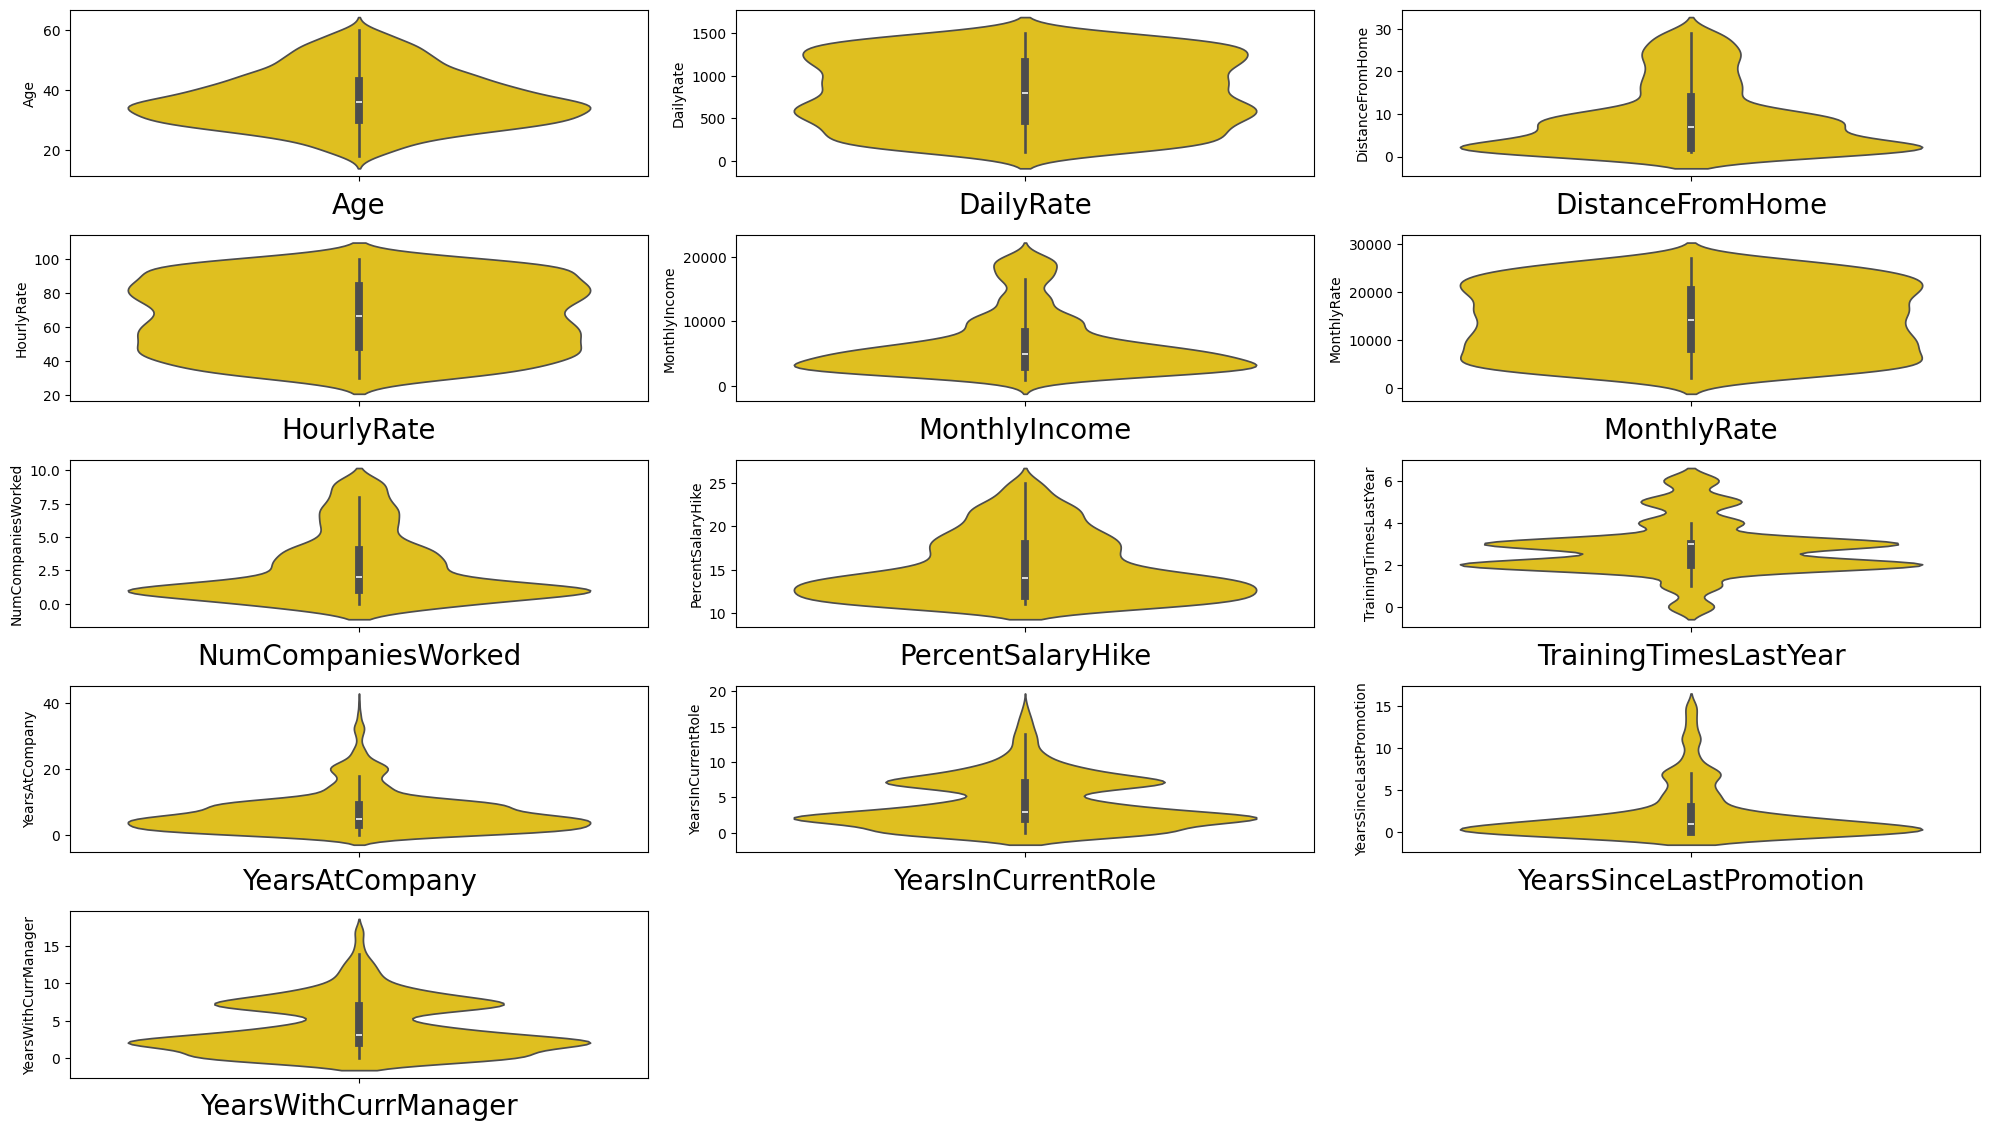

In [65]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor ='white')
plotnumber = 1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(data[i])
        plt.xlabel(i,fontsize = 20)
        plt.xticks(rotation = 30)
    plotnumber+=1
plt.tight_layout()
plt.show()

**Observation-:**

- For Majority of people have spend 3 to 10 years at company.
- Most of people staying company upto 2 years after promotion.
- Majority of people are train 2-3 times inlast years. If employees leaves job then it loss investment for company.
- Majority of people stay in same role for maximum 4 yrs.
- Majority of Employees have salary hike 10 to 15%.

# Age V/S Attrition

<Axes: xlabel='Age', ylabel='count'>

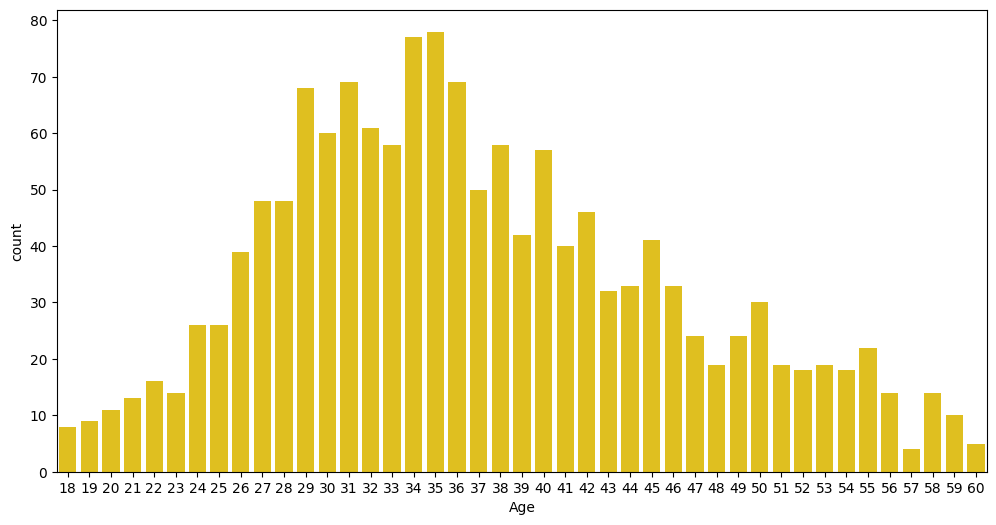

In [69]:
plt.subplots(figsize=(12,6))
sns.countplot(x='Age',data=data)

<Axes: xlabel='Age', ylabel='count'>

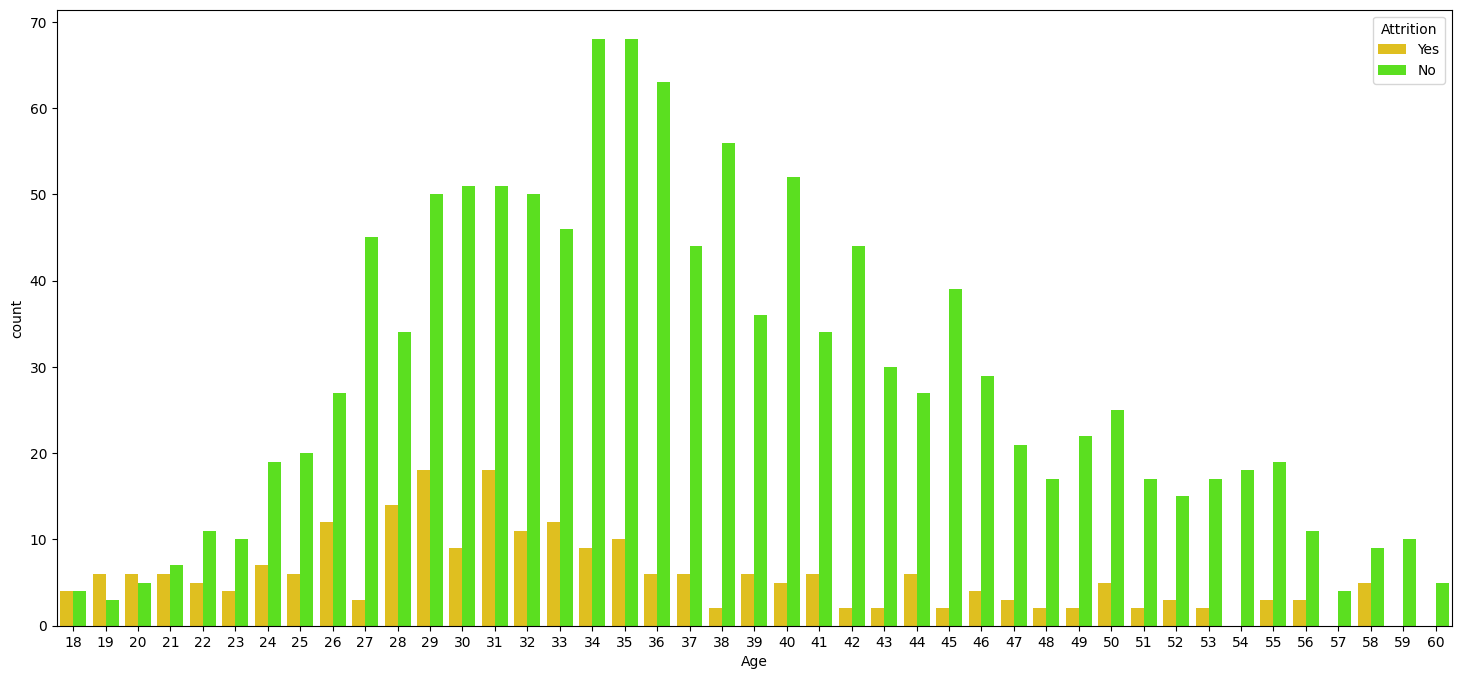

In [70]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition',data=data)

**Observation-:**

- The Attrition rate is minimum between the Age years of 34 and 35
- The Attrition rate is maximum between the Age years of 29 and 31

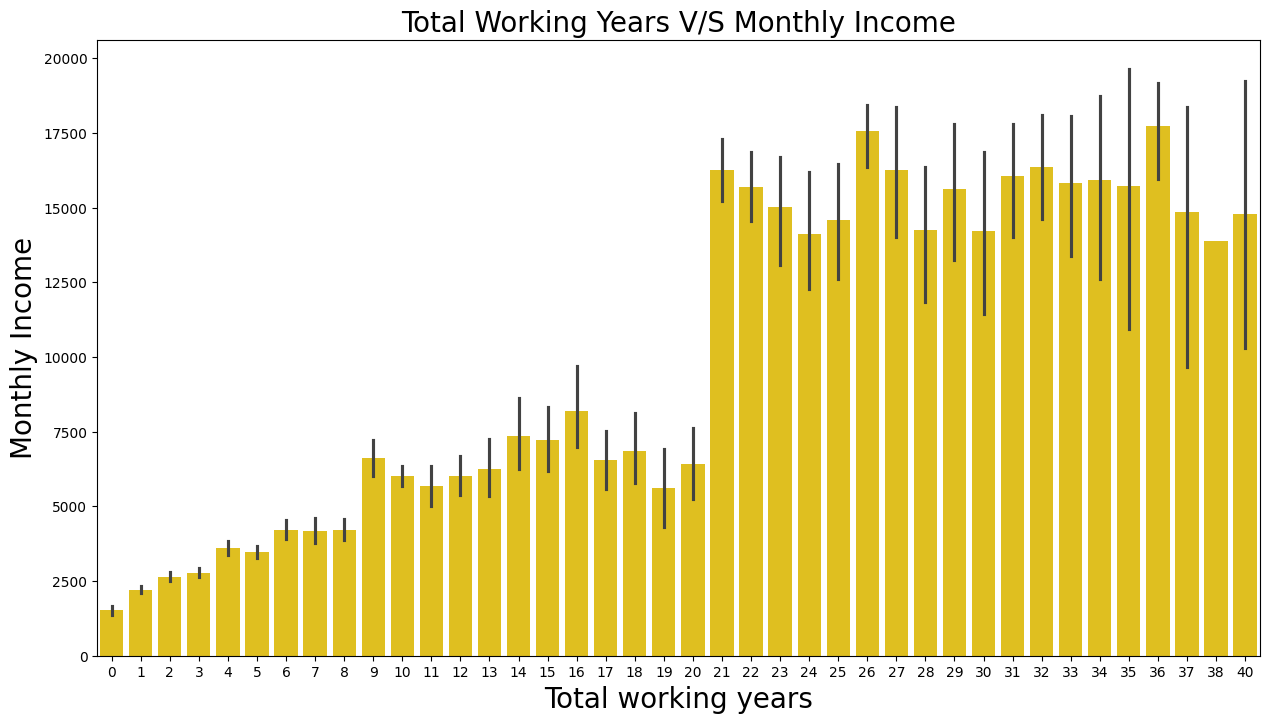

In [73]:
plt.figure(figsize = (15,8))
sns.barplot(x='TotalWorkingYears', y='MonthlyIncome',data = data)
plt.xlabel("Total working years",fontsize = 20)
plt.ylabel("Monthly Income",fontsize = 20)
plt.title("Total Working Years V/S Monthly Income", fontsize = 20)
plt.show()

**Observation-:**

Monthly income is highest for the employees with 21 or more number of total working years.

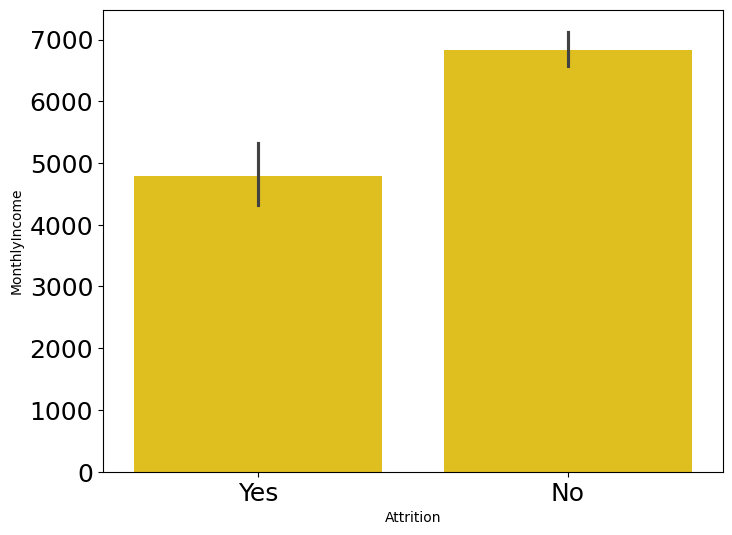

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome', data = data)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

**Observation-:**

The rate of Attrition is high when the employees did not got promoted since 1.8 years.

# Encoding Categorial Data

In [80]:
#using label encoder on target variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data["Attrition"])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [81]:
#Dropping unnecessary columns
data.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"], axis =1, inplace = True)

In [82]:
data.shape

(1470, 31)

In [83]:
# oridinal Encoding for oridinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encoder(data, column):
    data[column] = oe.fit_transform(data[column])
    return data
oe_col = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
data = ordinal_encoder(data, oe_col)
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


# Outlier detection and removal

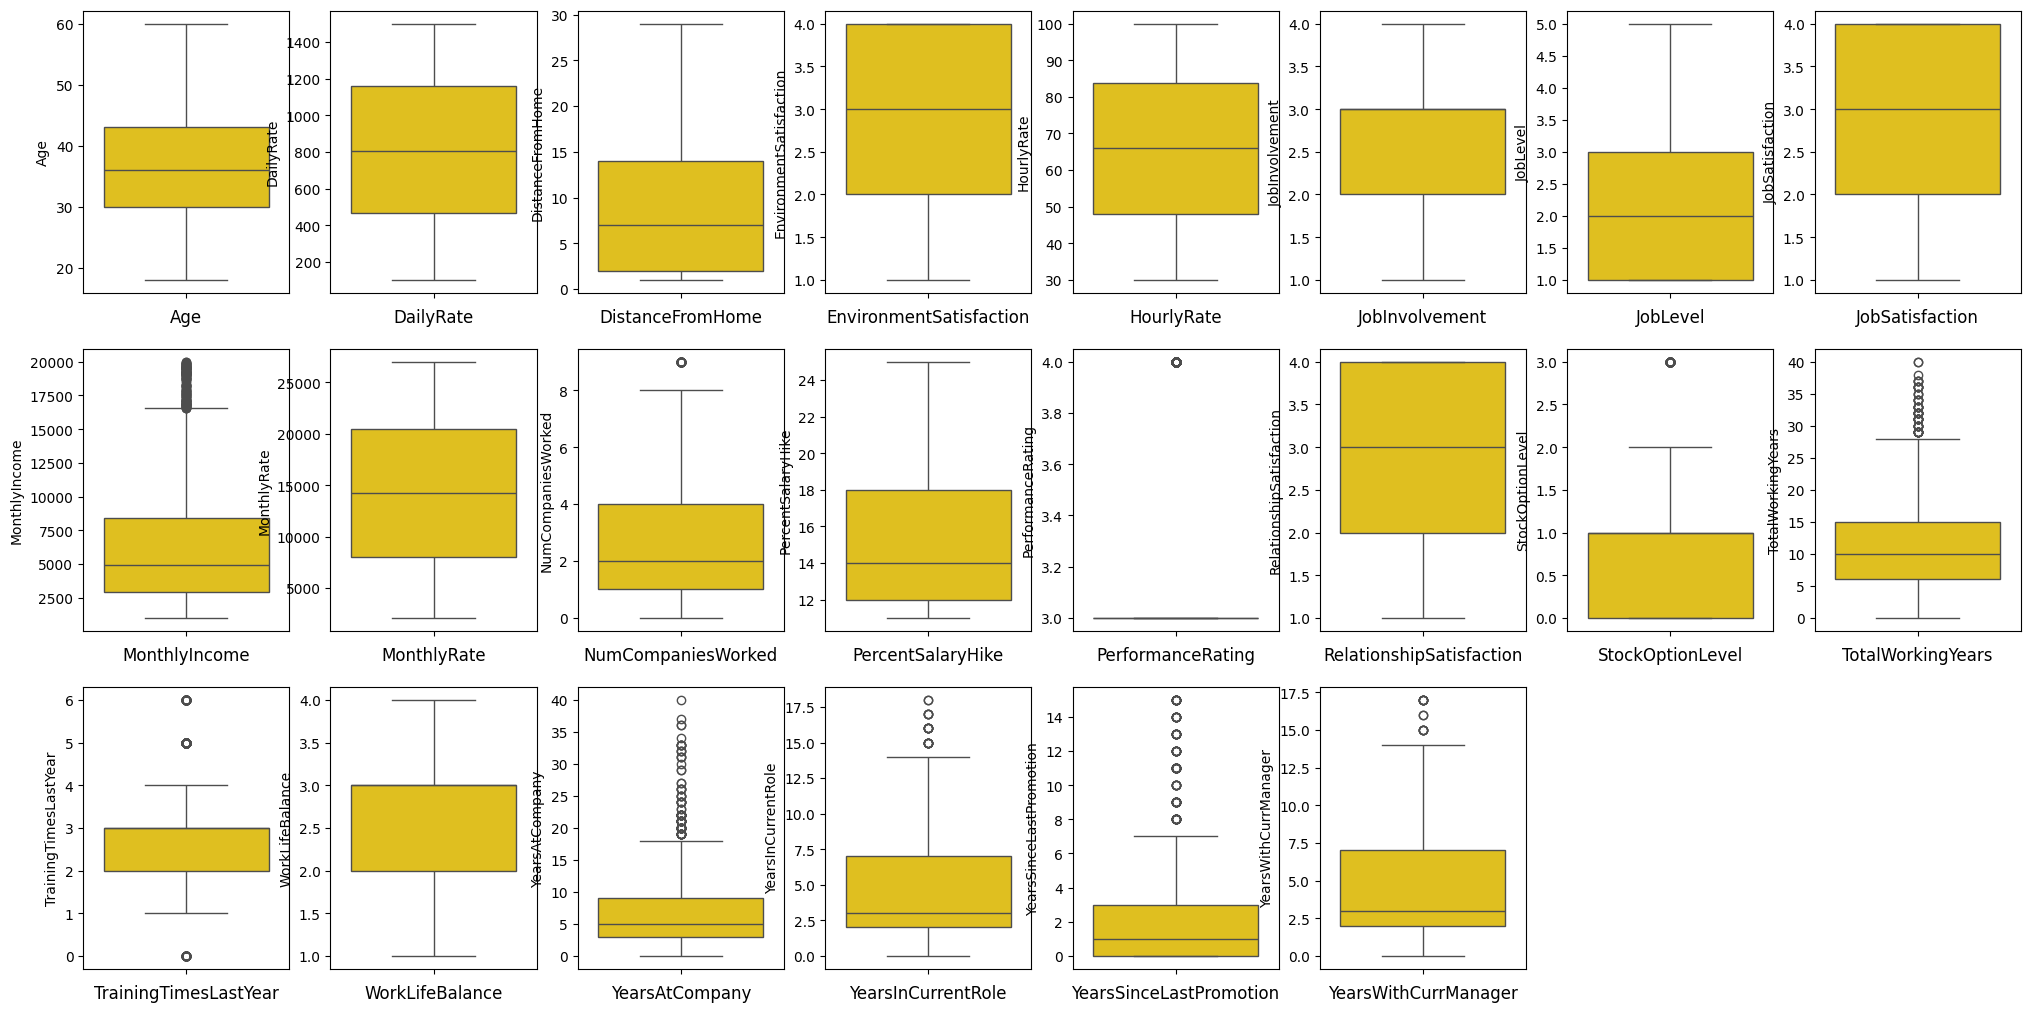

In [85]:
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1
for column in Numeric:
    if plotnumber <=28:
        ax = plt.subplot(7,8, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 12)
    plotnumber+=1
plt.show()

# Features Contain Outliers

"MonthlyIncome","NumCompaniesWorked","PerformanceRating","StockOptionLevel","TotalWorkingHours","TrainingTimesLastYear",

"YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","Attrition".

In [88]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]
print("Shape of the dataframe before removing outliers: ",data.shape)
print("Shape of the dataframe after removing outliers: ",df.shape)

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)


In [89]:
print("Percentage Data Loss",((1470-1387)/1470)*100,'%')

Percentage Data Loss 5.646258503401361 %


In [90]:
data = df.copy()

# Features Selection and Engineering

In [92]:
data.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

# Standard Scaling

In [94]:
# Spliting data in target and dependent features
x = data.drop(['Attrition'], axis = 1)
y = data['Attrition']

# Transforming skew data using power transform

In [96]:
from sklearn.preprocessing import power_transform
data = power_transform(x)
data = pd.DataFrame(data, columns=x.columns)
data.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

**Observation-:**

- For Numeric features skewness is transform within permissible limit.
- For ordinal features & categorial features skew parameter irrevalent

# Corrleation

In [100]:
data.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.019607,0.019864,-0.036344,-0.025855,0.215520,-0.037564,0.013967,-0.037163,0.026203,...,-0.002365,0.037296,0.089449,0.652405,-0.014951,-0.016180,0.207538,0.145404,0.114162,0.142446
BusinessTravel,0.019607,1.000000,-0.001984,-0.003560,-0.007041,-0.006468,0.034658,0.004183,-0.011439,0.026364,...,-0.021061,-0.036165,-0.006092,0.027298,0.006192,-0.017977,-0.024021,-0.035610,-0.033148,-0.032665
DailyRate,0.019864,-0.001984,1.000000,-0.003546,-0.006034,-0.017504,0.040993,0.034324,-0.003271,0.015156,...,0.000687,0.005771,0.049415,0.042750,0.005118,-0.046550,0.005391,0.022143,-0.035448,0.005908
Department,-0.036344,-0.003560,-0.003546,1.000000,0.037834,0.012780,0.082525,-0.013867,-0.030950,-0.000623,...,-0.038429,-0.037572,-0.000630,-0.006833,0.039938,0.017807,0.025457,0.057817,0.017699,0.024241
DistanceFromHome,-0.025855,-0.007041,-0.006034,0.037834,1.000000,0.002714,0.021074,-0.013409,0.010557,0.015607,...,0.013212,0.009379,0.027082,-0.012129,-0.015334,-0.030011,0.006570,0.013091,-0.003873,-0.002310
Education,0.215520,-0.006468,-0.017504,0.012780,0.002714,1.000000,-0.038405,-0.026095,-0.017807,0.011105,...,-0.023157,-0.004863,0.025621,0.150720,-0.023039,0.010164,0.037921,0.051072,0.016076,0.026651
EducationField,-0.037564,0.034658,0.040993,0.082525,0.021074,-0.038405,1.000000,0.042609,0.005059,-0.004372,...,-0.001393,-0.018254,-0.012936,-0.001827,0.054321,0.034788,0.004483,0.004372,0.023062,0.028189
EnvironmentSatisfaction,0.013967,0.004183,0.034324,-0.013867,-0.013409,-0.026095,0.042609,1.000000,-0.014940,-0.042512,...,-0.024853,0.016892,0.024345,-0.013356,-0.018350,0.030422,0.012338,0.029218,0.038031,0.006417
Gender,-0.037163,-0.011439,-0.003271,-0.030950,0.010557,-0.017807,0.005059,-0.014940,1.000000,0.005618,...,-0.010757,0.041439,0.024390,-0.049776,-0.039213,0.002726,-0.046018,-0.028101,-0.016131,-0.027972
HourlyRate,0.026203,0.026364,0.015156,-0.000623,0.015607,0.011105,-0.004372,-0.042512,0.005618,1.000000,...,-0.006571,0.005207,0.041329,-0.012902,-0.018396,-0.013811,-0.032827,-0.035899,-0.062271,-0.022931


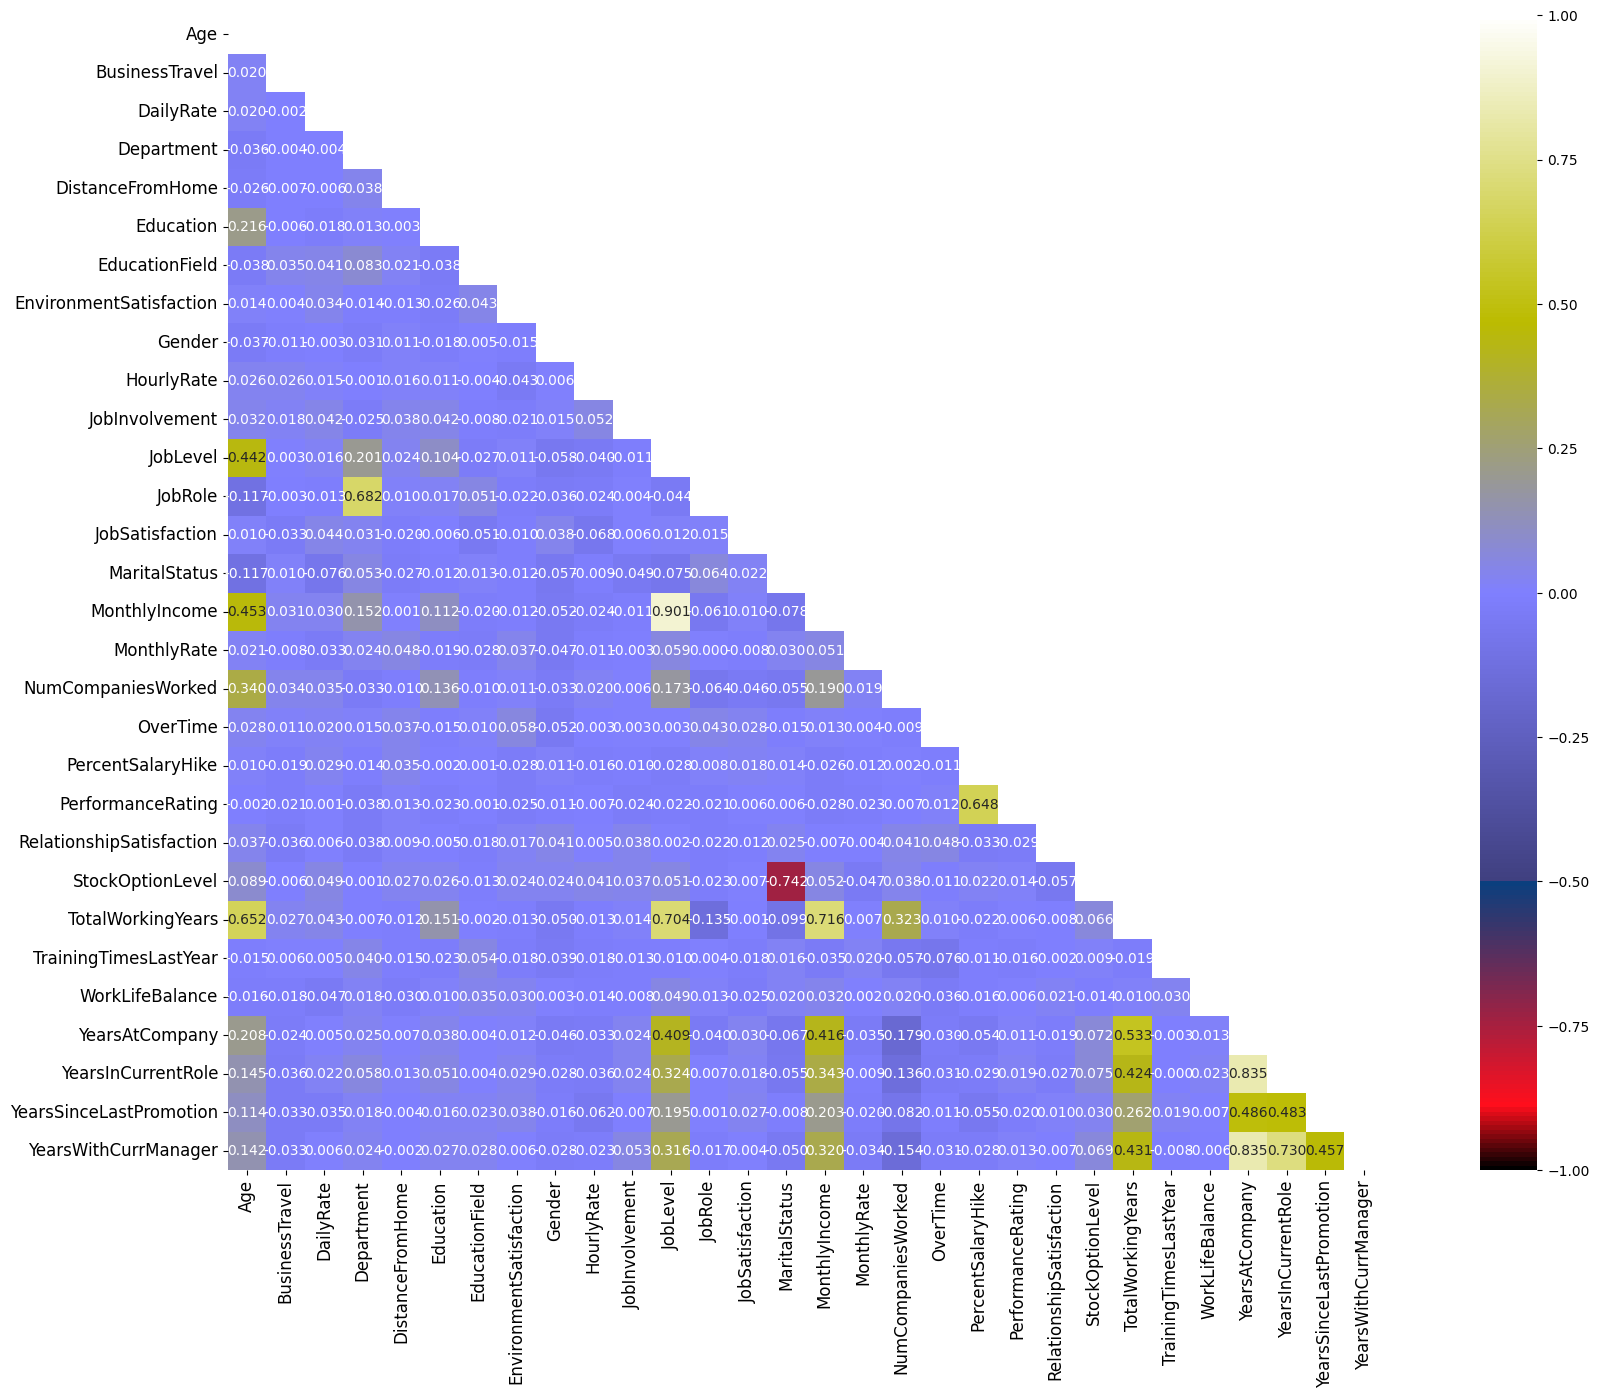

In [101]:
a = np.triu(data.corr())
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),vmin=-1,vmax = 1, annot = True, square = True, fmt='0.3f',
           annot_kws={'size':10},cmap='gist_stern',mask=a)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

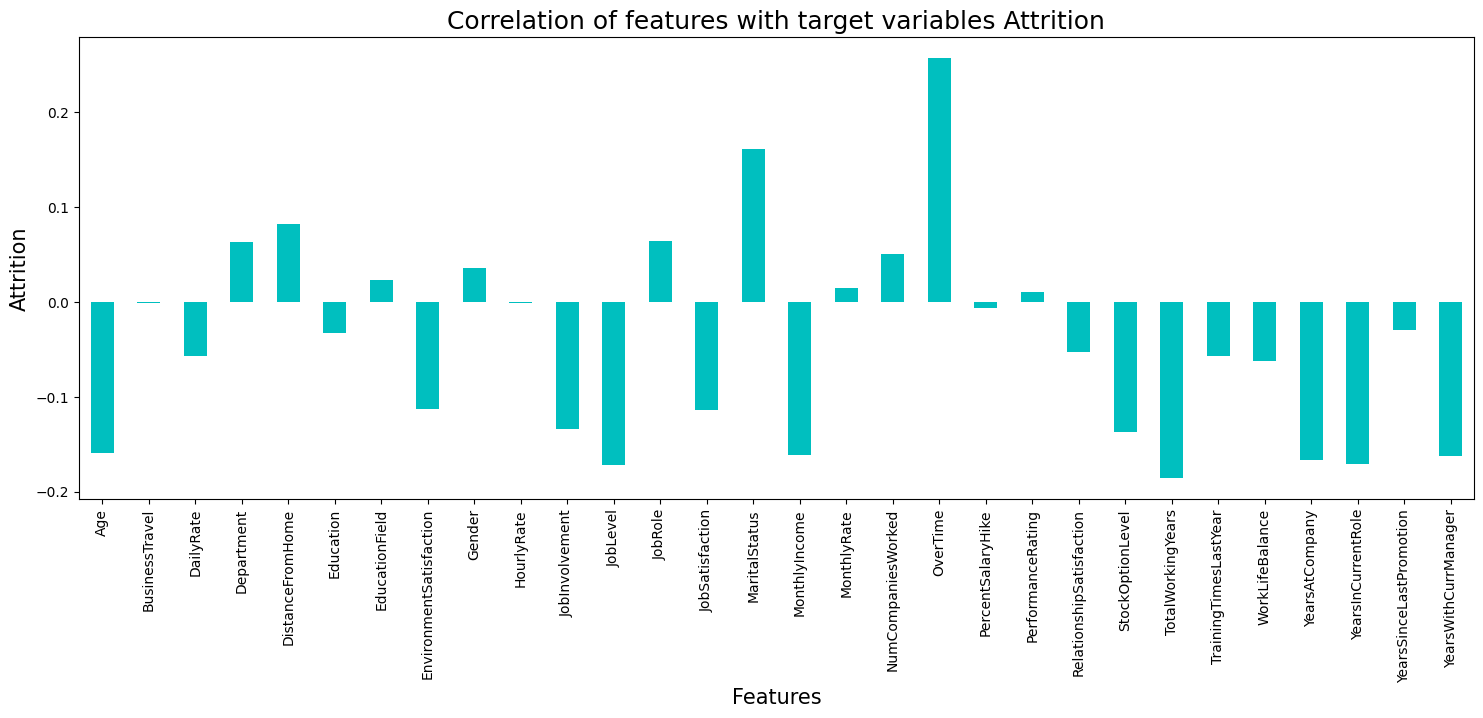

In [102]:
plt.figure(figsize=(18,6))
df.corr()['Attrition'].drop(['Attrition']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with target variables Attrition',fontsize=18)
plt.show()

**Observation-:**

- Age,JobLevel,MonthlyIncome is highly positively correlated with TotalWorkingYears.
- JobLevel is highly Positively correlated with the MonthlyIncome.
- PercentageSalaryHike is highly positively correlated with the column PerformanceRating.

# Checking Multicollinearity between features using variance_inflation_factor

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif['Features']=data.columns
vif

,VIF,Features
0,1.930457,Age
1,1.014314,BusinessTravel
2,1.025841,DailyRate
3,2.172093,Department
4,1.017385,DistanceFromHome
5,1.065266,Education
6,1.030480,EducationField
7,1.024396,EnvironmentSatisfaction
8,1.024366,Gender
9,1.024189,HourlyRate


**Observation-:**

**We can see that multicollinearity is when permissible limit of 10.**

# Balacing using SMOTE

In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
# oversampling using SMOTE Techniques
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [112]:
y.value_counts()

Attrition
1    1158
0    1158
Name: count, dtype: int64

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# PCA

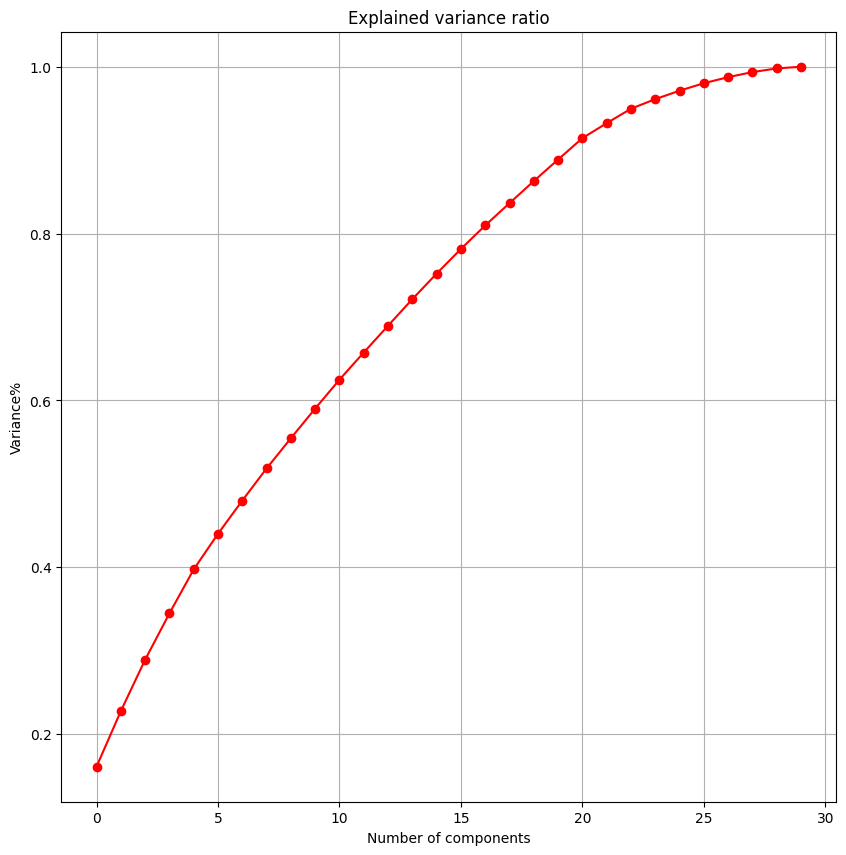

In [115]:
from sklearn.decomposition import PCA
pca = PCA()
# plot the graph to find the principal components
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of components')
plt.ylabel('Variance%')
plt.title("Explained variance ratio")
plt.grid()

In [116]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(x_scale)

In [117]:
pri_x = pd.DataFrame(x_new, columns=np.arange(21))

**Observation-:**

As the graph, we can see that 21 pricipal components attributes for 90% of variables in the data. We shall pick the first 21 components for our prediction.

# Machine Learning Model Building

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


In [122]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.33, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (1551, 21)
Training target vector : (1551,)
Test feature matrix size : (765, 21)
Test target vector size : (765,)


# Finding Best random rate

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,250):
    x_train,x_test,y_train,y_test= train_test_split(pri_x,y,test_size = 0.33, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.873202614379085 on Random_state 75


# Logistic Regression

In [126]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.33,random_state=242)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.857516339869281
Confusion Matrix Of Logistic Regression :  [[321  47]
 [ 62 335]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.84      0.87      0.85       368
           1       0.88      0.84      0.86       397

    accuracy                           0.86       765
   macro avg       0.86      0.86      0.86       765
weighted avg       0.86      0.86      0.86       765



# Cross Validation Score

In [128]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.65732759 0.69330454 0.66738661 0.7062635  0.73218143]
Mean CVS Score :  0.6912927310642735
Std Deviation :  0.026926530832132787


# GaussianNB

In [130]:
g = GaussianNB()
g.fit(x_train,y_train)
y_pred = g.predict(x_test)
print("GaussainNB Classifier")
print('\n')
print("Accuracy Score Of GaussianNB Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of GaussianNB Classifier Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of GaussianNB Classifier Classifier : ", classification_report(y_test,y_pred))

GaussainNB Classifier


Accuracy Score Of GaussianNB Classifier :  0.8248366013071895
Confusion Matrix Of GaussianNB Classifier Classifier :  [[314  54]
 [ 80 317]]
Classification Report Of GaussianNB Classifier Classifier :                precision    recall  f1-score   support

           0       0.80      0.85      0.82       368
           1       0.85      0.80      0.83       397

    accuracy                           0.82       765
   macro avg       0.83      0.83      0.82       765
weighted avg       0.83      0.82      0.82       765



# Cross Validation Score

In [132]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.65732759 0.69330454 0.66738661 0.7062635  0.73218143]
Mean CVS Score :  0.6912927310642735
Std Deviation :  0.026926530832132787


# Applying other classification algorithm

In [134]:
models =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :' + '\033[0m\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',classification_report(y_test,y_pred))
    print('\n')
    print('===================================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9032679738562092


Confusion Matrix 
 [[341  27]
 [ 47 350]]


Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       368
           1       0.93      0.88      0.90       397

    accuracy                           0.90       765
   macro avg       0.90      0.90      0.90       765
weighted avg       0.90      0.90      0.90       765



Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.807843137254902


Confusion Matrix 
 [[294  74]
 [ 73 324]]


Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       368
           1       0.81      0.82      0.82       397

    accuracy                           0.81       765
   macro avg       0.81      0.81      0.81       765
weighted avg       0.81      0.81      0.81       765

# CrossValidation

In [136]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=12),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('=====================================================================================================================')



Cross Validation Score SVC() is
Score [0.58405172 0.62634989 0.58315335 0.59179266 0.63282937]
Mean Score : 0.6036353988232666
Std Deviation 0.02150126341218541




Cross Validation Score DecisionTreeClassifier() is
Score [0.67887931 0.89632829 0.88984881 0.86825054 0.8812095 ]
Mean Score : 0.8429032918745811
Std Deviation 0.08254917083058058




Cross Validation Score KNeighborsClassifier(n_neighbors=12) is
Score [0.70043103 0.72138229 0.71922246 0.74946004 0.69762419]
Mean Score : 0.7176240038727937
Std Deviation 0.018578503319098744




Cross Validation Score RandomForestClassifier() is
Score [0.69612069 0.98488121 0.96328294 0.95680346 0.97408207]
Mean Score : 0.9150340731362181
Std Deviation 0.10987355686066513




Cross Validation Score AdaBoostClassifier() is
Score [0.59267241 0.93088553 0.92656587 0.9287257  0.94600432]
Mean Score : 0.864970767855813
Std Deviation 0.13632038344374944




Cross Validation Score GradientBoostingClassifier() is
Score [0.58836207 0.97408207 0.967

# Hyper Parameter Tunning: GridSearchCV

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
param = [{'n_estimators':[5,10,15,25,50,100],
         'criterion':['gini','entropy'],
         'max_depth':[5,10,20,40,50,None],
         'max_features':['auto','log2'],
          'bootstrap':[True]
         }]

In [140]:
gc = GridSearchCV(RandomForestClassifier(),param,cv = 5, n_jobs = -1,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 20, 40, 50, None],
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [5, 10, 15, 25, 50, 100]}],
             verbose=5)

In [141]:
gc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 50}

# Final Model

In [143]:
final = RandomForestClassifier(bootstrap = True ,criterion= 'gini', max_depth = None , max_features = 'log2', n_estimators = 100)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.8980392156862745


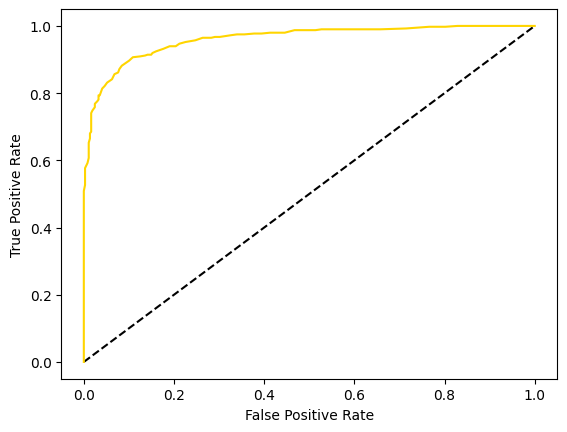

AUC SCORE 0.8986864801226592


In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = final.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score = roc_auc_score(y_test,final.predict(x_test))
print("AUC SCORE", auc_score)

# Saving Model

In [146]:
import joblib
joblib.dump(final,"HR_ANALYTICS")

['HR_ANALYTICS']